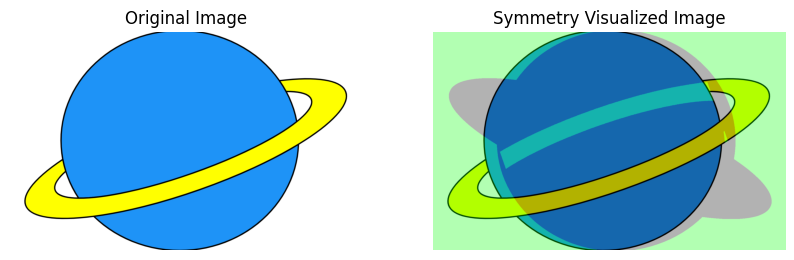

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Preprocess the input image for shape detection."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)  # Apply Gaussian Blur to reduce noise
    _, thresh = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)
    return thresh, image

def detect_shapes(thresh_image):
    """Detect closed shapes using contour detection."""
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def visualize_symmetry(original_image, contours):
    """Visualize the symmetrical parts of the shapes without filling spaces."""
    overlay_image = np.zeros_like(original_image)
    for contour in contours:
        if len(contour) >= 5:  # Ensure the contour is sufficiently large
            # Fit an ellipse to the contour to approximate symmetry
            ellipse = cv2.fitEllipse(contour)
            (x, y), (MA, ma), angle = ellipse
            
            # Create a mask for the contour
            mask = np.zeros_like(original_image)
            cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)
            
            # Rotate the mask to align the major axis with the vertical
            M = cv2.getRotationMatrix2D((x, y), angle, 1.0)
            rotated_mask = cv2.warpAffine(mask, M, (original_image.shape[1], original_image.shape[0]))
            
            # Flip the rotated mask vertically to reflect the shape
            reflected_mask = cv2.flip(rotated_mask, 1)
            
            # Rotate back to the original orientation
            M = cv2.getRotationMatrix2D((x, y), -angle, 1.0)
            reflected_shape = cv2.warpAffine(reflected_mask, M, (original_image.shape[1], original_image.shape[0]))
            
            # Convert the reflected shape to grayscale and create a binary mask
            reflected_shape_gray = cv2.cvtColor(reflected_shape, cv2.COLOR_BGR2GRAY)
            _, reflected_binary_mask = cv2.threshold(reflected_shape_gray, 1, 255, cv2.THRESH_BINARY)
            
            # Combine the reflected shape with the overlay image
            overlay_image[reflected_binary_mask > 0] = (0, 255, 0)
    
    # Combine the overlay image with the original image for visualization
    visualized_image = cv2.addWeighted(original_image, 0.7, overlay_image, 0.3, 0)
    
    return visualized_image

# Example usage
image_path = "D:\curve now\Screenshot 2024-08-06 211234.png"  # Replace with your PNG file path
thresh_image, input_image = preprocess_image(image_path)
contours = detect_shapes(thresh_image)

# Visualize the symmetrical parts without filling spaces
output_image = visualize_symmetry(input_image, contours)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Symmetry Visualized Image')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


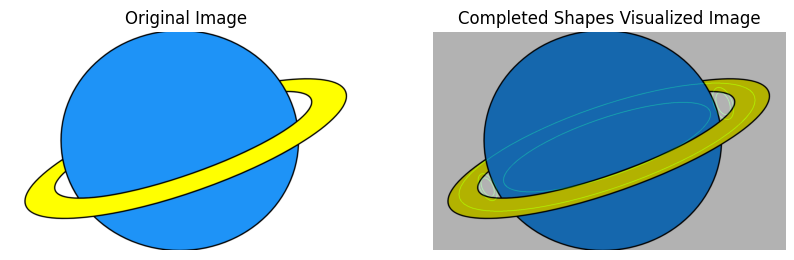

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    """Preprocess the input image for shape detection."""
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh, image

def detect_shapes(thresh_image):
    """Detect closed shapes using contour detection."""
    contours, _ = cv2.findContours(thresh_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours

def is_circle(contour, epsilon=0.1):
    """Check if a contour is roughly circular."""
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon * perimeter, True)
    if len(approx) >= 8:
        return True
    return False

def is_ring(contour, min_contour_area=100):
    """Check if a contour is likely a ring (based on the area of the contour)."""
    area = cv2.contourArea(contour)
    if area > min_contour_area:
        return True
    return False

def visualize_completed_shapes(original_image, contours):
    """Visualize the completed circular shapes (circles and rings)."""
    overlay_image = np.zeros_like(original_image)
    for contour in contours:
        if is_circle(contour):
            # Fit an ellipse to the circle contour
            ellipse = cv2.fitEllipse(contour)
            (x, y), (MA, ma), angle = ellipse
            cv2.ellipse(overlay_image, (int(x), int(y)), (int(MA / 2), int(ma / 2)), angle, 0, 360, (0, 255, 0), 2)
        elif is_ring(contour):
            # Fit an ellipse to the ring contour and draw two concentric ellipses
            ellipse = cv2.fitEllipse(contour)
            (x, y), (MA, ma), angle = ellipse
            cv2.ellipse(overlay_image, (int(x), int(y)), (int(MA / 2), int(ma / 2)), angle, 0, 360, (0, 255, 0), 2)
            # Draw the inner ellipse with some padding to represent the ring thickness
            inner_ellipse_size = (int(MA / 2 * 0.7), int(ma / 2 * 0.7))
            cv2.ellipse(overlay_image, (int(x), int(y)), inner_ellipse_size, angle, 0, 360, (0, 255, 0), 2)

    # Combine the overlay image with the original image for visualization
    visualized_image = cv2.addWeighted(original_image, 0.7, overlay_image, 0.3, 0)
    
    return visualized_image

# Example usage
image_path = "D:\curve now\Screenshot 2024-08-06 211234.png"  # Replace with your PNG file path
thresh_image, input_image = preprocess_image(image_path)
contours = detect_shapes(thresh_image)

# Visualize the completed circular shapes (circles and rings)
output_image = visualize_completed_shapes(input_image, contours)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Completed Shapes Visualized Image')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
